<a href="https://colab.research.google.com/github/Valiturbide/EXAMEN-3/blob/main/EXAMENU3_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXAMEN PRACTICA





a) Obtén una serie de tiempo desde el primero de enero de 2015 hasta el primero de enero de 2018, cuya unidad de tiempo sea de un día y realiza las modificaciones necesarias para trabajarla.

In [ ]:
import yfinance as yf # Permite acceder a datos historicos financieros
import pandas as pd #Es una biblioteca de manipulacion de datos
import matplotlib.pyplot as plt #es un módulo de la biblioteca de visualización
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Descargar datos desde Yahoo Finance
df = yf.download(                 #Descarga y almacena datos en el objeto df
      tickers = "PINS",           #Especifica el símbolo bursátil de la acción que se va a descargar,
      start = "2019-01-01",       #Define el rango de fechas para los datos históricos de la acción
      end = "2023-01-01",
      interval = "1d",            #indica que se descargará información diaria
      group_by = None,            #Controla si los datos deben agruparse por tickers o no
      auto_adjust = True,         #Activa el ajuste automático de precios
      actions = False             #Excluye datos relacionados con acciones de la empresa
)
df
# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()       #Este código convierte el índice Date en una columna normal del DataFrame

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]
df

####################################################################################################
##En caso de que no se requiera la hora
#Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

#Extraer la parte de fecha sin la hora
df['Date'] = df['Date'].dt.date
####################################################################################################
df.set_index('Date', inplace=True)
df

[*********************100%***********************]  1 of 1 completed


,PINS_Open,PINS_High,PINS_Low,PINS_Close,PINS_Volume
Date,,,,,
2019-04-18,23.750000,25.180000,23.049999,24.400000,87109500
2019-04-22,24.620001,25.680000,23.570000,24.990000,19746800
2019-04-23,25.379999,27.750000,25.230000,25.850000,19245400
2019-04-24,26.500000,27.030001,25.933001,26.799999,9477200
2019-04-25,27.450001,29.400000,26.670000,28.799999,16648300
...,...,...,...,...,...
2022-12-23,24.520000,24.920000,24.299999,24.530001,5994700
2022-12-27,24.200001,24.260000,23.410000,23.430000,7382000
2022-12-28,23.230000,23.520000,22.790001,22.860001,7859800


b) Grafica la serie de tiempo junto con dos medias móviles con diferente tamaño de ventana (una que sea la mitad de la otra, por ejemplo) e indica como esto te puede ayudar a visualizar cambios de tendencia.

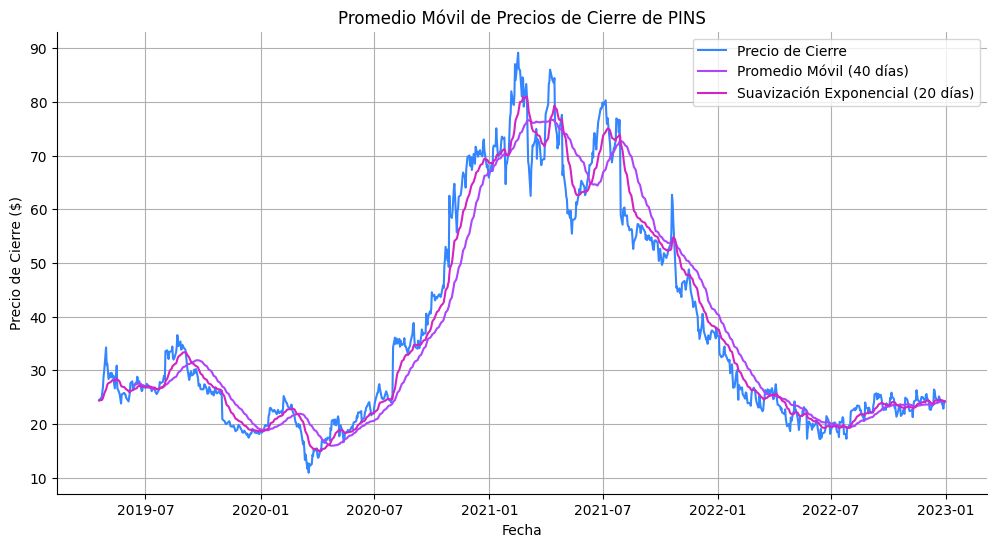

In [ ]:
# Promedio Móvil Simple
ventana_sma = 40
df['SMA'] = df['PINS_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 20
df['SES'] = df['PINS_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['PINS_Close'], label='Precio de Cierre', color='#3386ff')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='#ae44fc')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='#d324c3')
plt.title('Promedio Móvil de Precios de Cierre de PINS')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

El código generado nos ayuda a saber el precio más reciente de cierre de la empresa PINS, aquí podemos ver la tendencia general de los precios, suavizando fluctuaciones a largo plazo.

c) Realiza una regresión polinomial del grado que consideres necesario (a prueba y error). Grafica la serie de tiempo y la regresión polinomial.

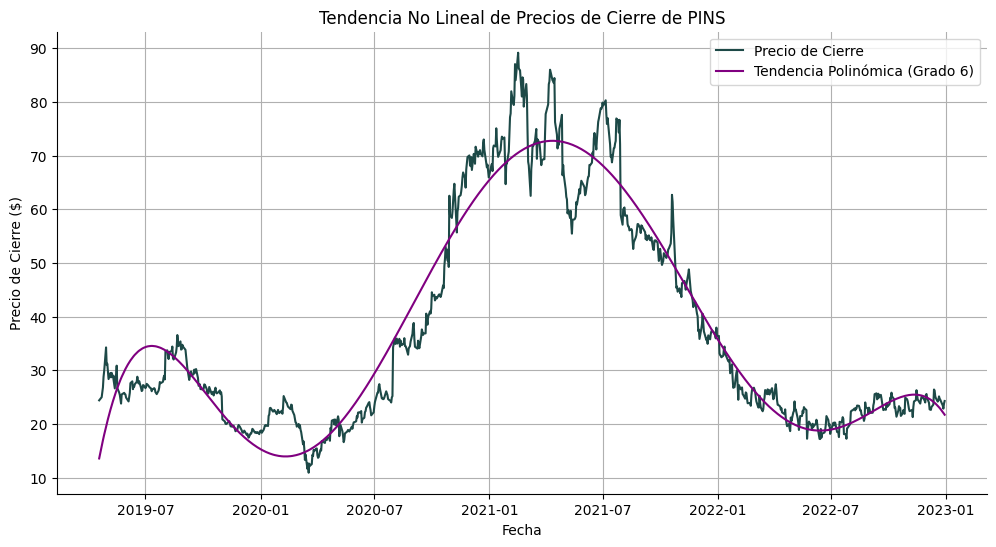

In [ ]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['PINS_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 6
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='#1d4947'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='purple')
plt.title('Tendencia No Lineal de Precios de Cierre de PINS') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)



Este código permite visualizar de manera más clara la tendencia que siguen los precios, lo que facilita realizar un análisis más detallado.
El gráfico muestra que los precios alcanzaron su punto máximo entre 2021-01 y 2021-07. A partir de ahí, comenzó un descenso pronunciado que continuó hasta 2022-01, cuando los precios se estabilizaron y mostraron menor volatilidad
Los ciclos reflejan patrones de crecimiento y declive, con un período de ascenso entre 2021-01 y 2021-07 y un descenso pronunciado de 2021-07 a 2022. Esto podría indicar un comportamiento cíclico del mercado, pero no necesariamente ligado a la estacionalidad.

d) Gráfica los residuales del polinomio e intenta deducir una estacionalidad.

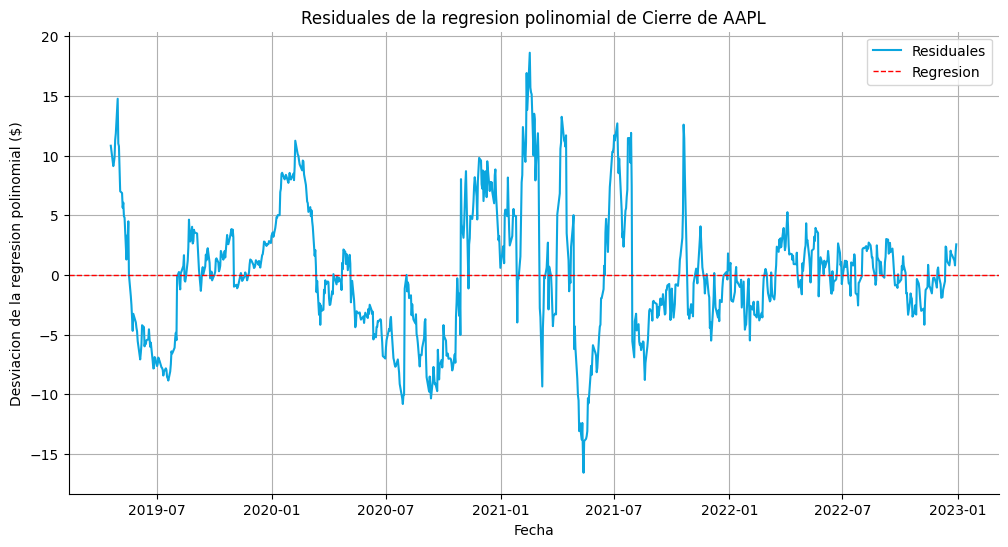

In [ ]:
# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='#0ba6df')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de PINS')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [ ]:
# Aquí no le muevan a nada
# Básicamente, lo que se hace este bloque es crear la función
# Transformada_de_Fourier, puesto a que no existe para lo que la quiero usar.

def Transformada_de_Fourier(serie, terminos, un_grafico):
  '''La función acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el parámetro "terminos" es un número natural que indica la cantidad de
  términos que desarrolla la serie. Entre mayor sea el número de términos,
  la serie será más precisa, pero más difícil de interpretar.

  La función tiene como salida una lista con los componentes sinosoidales de serie.
  El último elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Supongamos que tienes una serie en df['AAPL_Close']
  # Reemplaza esta línea con tu DataFrame y serie específicos
  n = len(serie)

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en términos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el índice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # índice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la señal en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='red')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

<ipython-input-5-2f59e4dce7ab>:34: RuntimeWarning: divide by zero encountered in divide
  'longitud_de_onda': 1 / frecuencias


Frecuencias principales:
    frecuencia     magnitud  longitud_de_onda
0    0.003212  1328.214973        311.333333
1    0.004283  1198.219883        233.500000
2    0.010707  1100.509298         93.400000
3    0.012848   822.083953         77.833333
4    0.005353   728.394263        186.800000


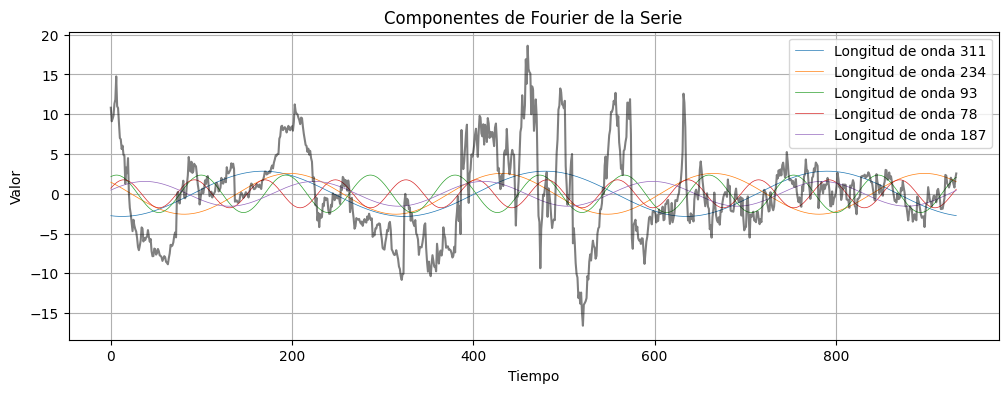

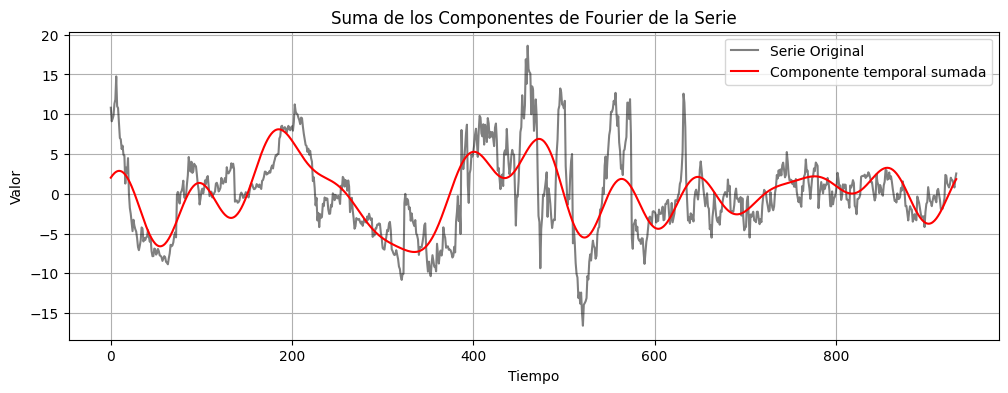

In [ ]:
serie = df['Poly_Resid'].values
terminos = 5
un_grafico = False

cts = Transformada_de_Fourier(serie, terminos, un_grafico)

# cts: componente temporal sumado


En general, el codigo nos ayuda a comprender sus patrones periodico y también ayuda a predecir tendencias futuras.
Adémas nos ayuda a reducir el ruido

e) Descompón la serie de tiempo en sus componentes: tendencia, estacionalidad y ruido. Grafica la descomposición.

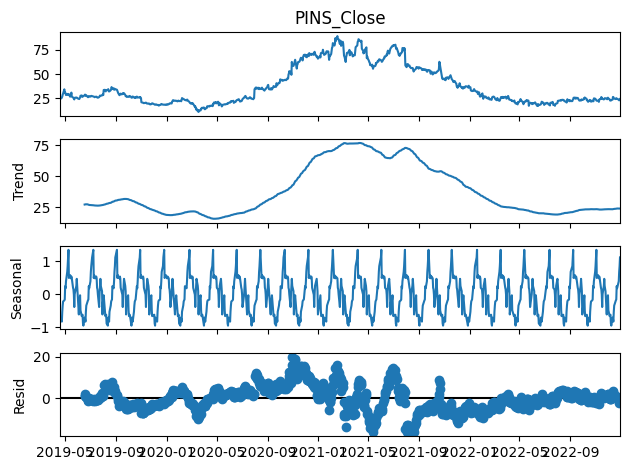

In [ ]:
# Descomponer la serie temporal
descomposicion = sm.tsa.seasonal_decompose(
    df['PINS_Close'],
    model='additive',
    period=40,
    extrapolate_trend=0,
    two_sided=False,
)  # 252 días de negociación al año

fig = descomposicion.plot()
plt.show()


Tendencia: Identifica si hay un incremento, descenso o estabilidad en los precios de cierre a lo largo del tiempo.

Estacionalidad: Determina los patrones recurrentes, como fluctuaciones mensuales o anuales en los precios.

Residuos: Evalúa qué tanto ruido o variabilidad queda tras retirar tendencia y estacionalidad. Si los residuos tienen poca estructura, indica que el modelo es adecuado.

f) Realiza una prueba de hipótesis para comprobar que se haya capturado correctamente la estacionalidad. Y realiza otra prueba de hipótesis para comprobar si la estacionalidad es significativa.

In [ ]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipotesis nula (H0): La serie tiene una raiz unitaria (no es estacionaria)
#Hipotesis alternativa (H1): La serie es estacionaria
from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

#Realizar la prueba de Dickey-Fuller en lo la tendencia
adf_test = adfuller(descomposicion.resid.dropna())

print('Estadistico ADF:',adf_test[0])
print('P-valor:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print('La tendencia es estacionaria (rechazamos la hipotesis nula)')
else:
    print('La tendencia no es estacionaria (aceptamos la hipotesis nula)')

Estadistico ADF: -4.3347601684352695
P-valor: 0.00038651370386844774
La tendencia es estacionaria (rechazamos la hipotesis nula)


Dado que el p-valor es menor que 0.05, se rechaza la hipótesis nula (H0), lo que sugiere que la serie temporal es estacionaria. En otras palabras, no hay una tendencia persistente en los residuos, y por lo tanto, se puede decir que la estacionalidad se ha capturado correctamente en la descomposición.

In [ ]:
from scipy.stats import ttest_rel

# Prueba t pareada para el efecto significativo de la estacionalidad

#Hipótesis nula (H₀): Ambas series son iguales.
#Hipótesis alternativa (H₁): Ambas series son diferentes


nivel_de_significancia = 0.05
tendencia = descomposicion.trend
tendencia_estacionalidad = descomposicion.seasonal + descomposicion.trend

# Eliminar valores NaN de ambas series
tendencia.dropna(inplace=True)
tendencia_estacionalidad.dropna(inplace=True)

# Realizar la prueba t pareada
t_stat, p_valor = ttest_rel(tendencia, tendencia_estacionalidad)

print("Estadístico t:", t_stat)
print("Valor p:", p_valor)
print("\n")

# Interpretación de los resultados
if p_valor < nivel_de_significancia:
    print("El valor p es menor que 0.05, por lo tanto, rechazamos la hipótesis nula.")
    print("Conclusión: La estacionalidad tiene un efecto significativo en la serie de tiempo.")
else:
    print("El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.")

Estadístico t: 0.013040766716764397
Valor p: 0.9895981812646282


El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.
Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.


La estacionalidad no tiene un efecto significativo en la serie de tiempo, ya que el p-valor es mayor que 0.05. Esto significa que no hay evidencia suficiente para afirmar que la estacionalidad influye significativamente en el comportamiento de la serie temporal, al menos en la forma en que se ha medido en este análisis.

g) Utilizando los componentes de la descomposición, realiza un gráfico que contenga la serie de tiempo real, la tendencia, la serie sin estacionalidad, y la serie sin ruido.

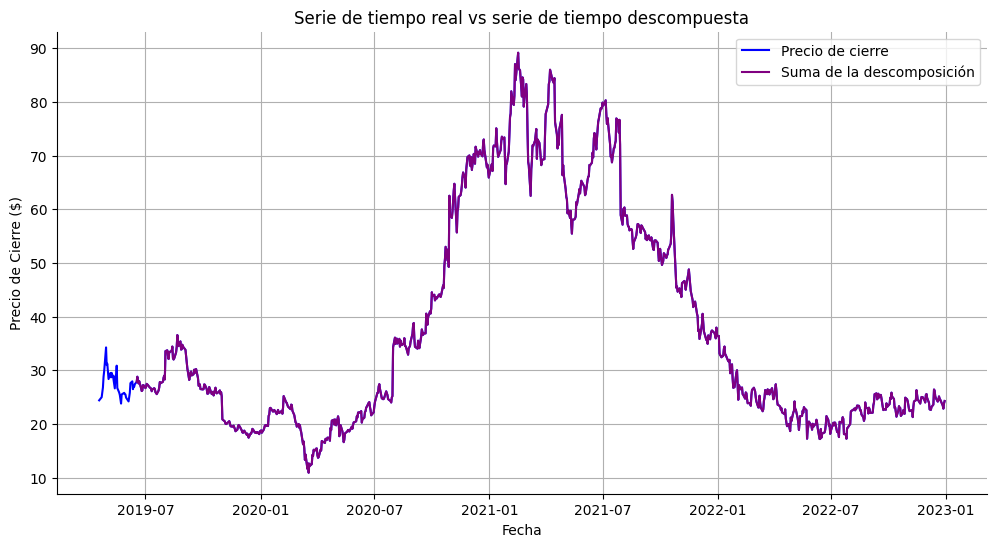

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['PINS_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal + descomposicion.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

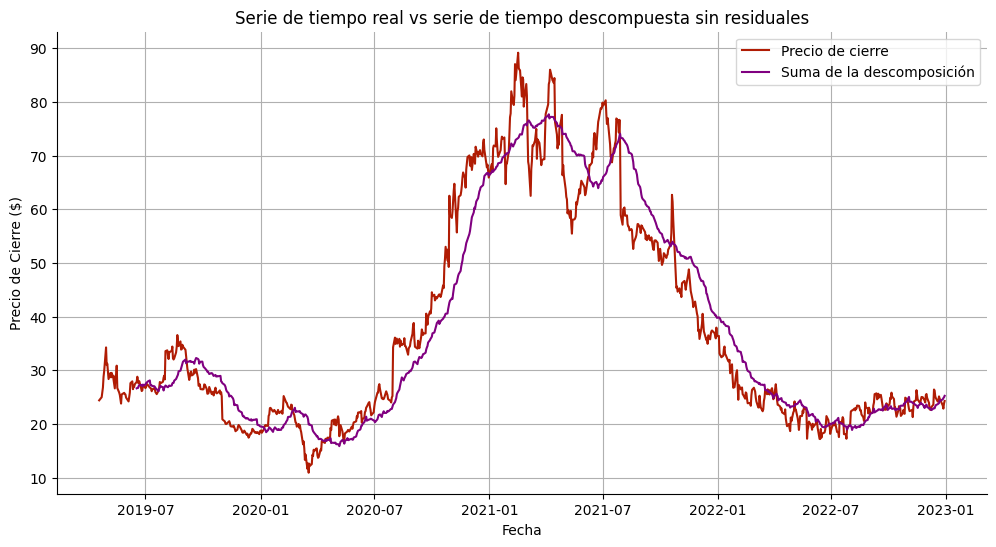

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['PINS_Close'], label='Precio de cierre', color='#b01c04')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

En esta gráfica podemos ver la serie original de color rojo y la linea de morado es la suma de la descomposición sin residuales.

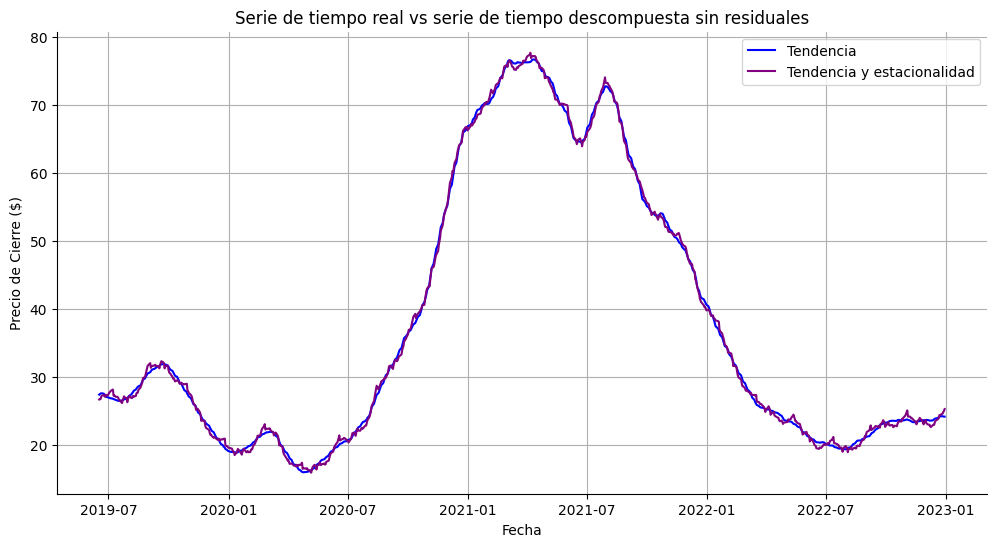

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(descomposicion.trend, label='Tendencia', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Tendencia y estacionalidad', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()# Graficar descomposición


La gráfica te permitirá observar la diferencia entre la serie de tiempo sin estacionalidad (solo la tendencia) y cómo los patrones estacionales impactan sobre ella. Si la estacionalidad es significativa, verás fluctuaciones regulares en la línea morada (tendencia + estacionalidad), lo cual ayuda a comprender los ciclos y patrones a lo largo del tiempo.

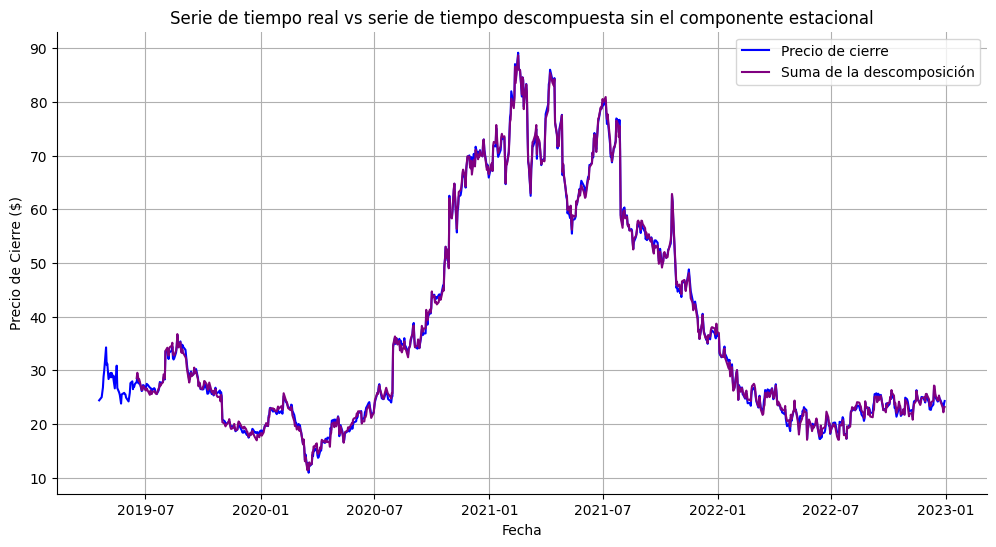

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['PINS_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin el componente estacional')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

 Se visualiza la tendencia y el ruido residual de la serie afectan a los precios de cierre a lo largo del tiempo, sin las fluctuaciones estacionales. Esto te ayuda a centrarte en los patrones de largo plazo y en la variabilidad aleatoria sin que los ciclos estacionales influencien la interpretación de la serie temporal.

i) Realizar una conclusión general del trabajo, incluyendo los hallazgos y posibles aplicaciones de los resultados obtenidos.

CONCLUSIÓN

Las posibles aplicaciones hablando del área financiera, es describir y predecir los fénomenos que hacen que existan fluctuaciones, temporadas de auge o de baja. Todos los hallazgos que se tomaron en cuenta, desde el primer paso, como nos pudimos dar cuenta en un principio fue la gráfica, esta nos mostraba que no era estacionaria, o mejor dicho no seguia algún patrón que determinara que en cierto momento bajara o subiera el precio, sin embargo, a tráves de los distintos factores que se fueron desglosando pudimos determinar una mejorar estacionalidad, uno de los factores son los residuales, los cuales se pueden definir como los errores o los sucesos que varian, la tendencia básicamente  se refiere a un cambio a largo plazo en los datos, que puede ser ascendente, descendente o constante y por último la estacionalidad se refiere a los fluctuaciones regulares y repetitivas que ocurren dentro de un ciclo de tiempo determinado.
Adémas de ayudar a predecir si seria viable o no comprar en cierto tiempo las acciones o en el momento que podemos ganar o perder, ayuda a las empresas a prevenirse en caso de que desciendan las acciones, o por el contrario, los ayuda a mejo0rar en caso de un ascenso, estos podrían ser los principales usos.

En general, pudimos ver como una vez que se alcanzaba el auge en las acciones, por consecuente venía una baja, y posteriormente por un tiempo se mantiene constante en los precios de las acciones.
